In [87]:
from post_process import load
from file_paths import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
plt.rcParams['figure.dpi'] = 150


In [2]:
wt = load(path_dir_s1 + 'wt_numer.pkl')
rbt = load(path_dir_s1 + 'rbt_numer.pkl')

In [3]:
wt_b = np.array(wt)[[5,6,7]]
rbt_b = np.array(rbt)[[5,6,7]]

In [4]:
rbt_imp = np.percentile(rbt_b, 97, axis=-1)
(rbt_imp - rbt_imp[0])/rbt_imp[0]

array([ 0.        , -0.03390412, -0.19028045])

In [100]:
# for the weight analysis
w3 = load(path_p_ddqn_ha3)
w5 = load(path_p_ddqn_ha5)
w7 = load(path_p_ddqn_ha7)
w9 = load(path_p_ddqn_ha9)
w11 = load(path_p_ddqn_ha11)
rbt_w = load('out/compare/weights/rbt_numer.pkl')
wt_w = load('out/compare/weights/wt_numer.pkl')
tt_w = load('out/compare/weights/all_trip_t.pkl')

In [102]:
np

5

In [104]:
np.percentile(rbt_w, 75, axis=-1), np.percentile(wt_w, 75, axis=-1), np.percentile(tt_w, 75, axis=-1)

(array([2.19492991, 2.01148135, 2.0165655 , 2.00479464, 2.13284607]),
 array([3.10988768, 2.87529402, 2.8610118 , 2.78767852, 2.90632763]),
 array([4353.35 , 4339.9  , 4365.375, 4317.625, 4371.225]))

In [103]:
np.std(wt_w, axis=-1), np.std(rbt_w, axis=-1), np.std(tt_w, axis=-1)

(array([0.23354261, 0.20686344, 0.2603863 , 0.21401859, 0.26009711]),
 array([0.3263047 , 0.34221371, 0.33373936, 0.28816981, 0.35737393]),
 array([249.29834848, 253.16923413, 232.37848116, 221.07708329,
        227.22135357]))

In [29]:
# for hypothesis testing on wait time groups
nc = load(path_p_nc_b)
eh = load(path_p_eh_b)
ddqnla = load(path_p_ddqn_la_b)
ddqnha = load(path_p_ddqn_ha_b)

In [30]:
all_pax = []

for scenario, name_scen in zip([nc, eh, ddqnla, ddqnha], ['nc', 'eh', 'ddqnla', 'ddqnha']):
    for replication in scenario:
        all_pax += [[p.orig_idx, p.wait_time, name_scen] for p in replication]

In [31]:
wt_by_scen = pd.DataFrame(all_pax, columns=['orig_idx', 'wait_time', 'scenario'])

In [18]:
wtc = wt_by_scen.groupby(['orig_idx', 'scenario'])['wait_time'].mean().reset_index()

In [62]:
wtcount = wt_by_scen.groupby(['orig_idx'])['wait_time'].count().reset_index()

In [56]:
spec_stop = wt_by_scen[wt_by_scen['orig_idx']==53].copy()
for sc in spec_stop['scenario'].unique():
    spec_scen = spec_stop[spec_stop['scenario']==sc]
    print(sc, spec_scen.shape[0])

nc 606
eh 629
ddqnla 612
ddqnha 634


In [57]:
ttest_ind(spec_stop.loc[spec_stop['scenario']=='ddqnha', 'wait_time'], spec_stop.loc[spec_stop['scenario']=='eh', 'wait_time'], equal_var=False)

Ttest_indResult(statistic=-2.0049328543272003, pvalue=0.04519045417437392)

In [77]:
spec_stop.loc[spec_stop['scenario']=='eh', 'scenario'] = 'EH'
spec_stop.loc[spec_stop['scenario']=='ddqnha', 'scenario'] = 'DDQN-HA'

Text(0.5, 0, 'wait time (mins)')

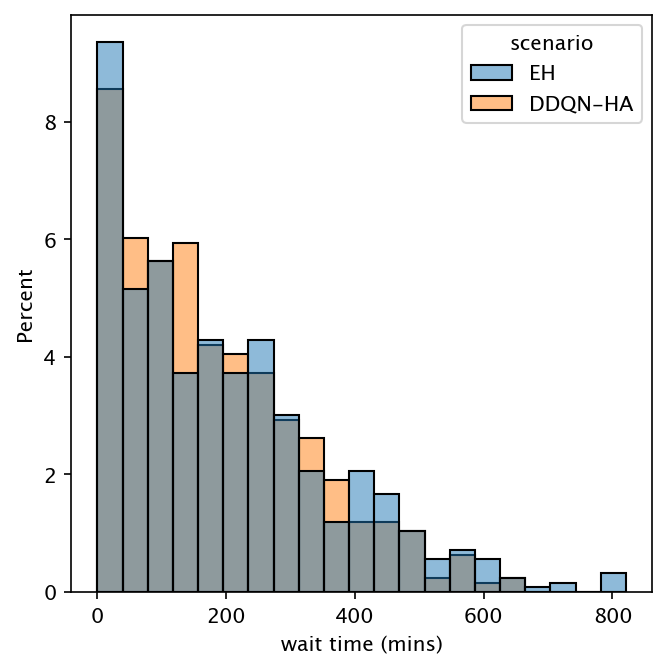

In [86]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(data=spec_stop[(spec_stop['scenario'].isin(['EH', 'DDQN-HA'])) & (spec_stop['wait_time']<1000)], x='wait_time', hue='scenario', stat='percent', ax=ax)
ax.set_xlabel('wait time (mins)')

In [66]:
ddqnha = spec_stop[spec_stop['scenario']=='ddqnha'].copy()
eh = spec_stop[spec_stop['scenario']=='eh'].copy()

In [69]:
ehmean = eh['wait_time'].mean()

change_mean = ddqnha['wait_time'].mean() - eh['wait_time'].mean()

eh95 = eh['wait_time'].quantile(0.95)
change_95 = ddqnha['wait_time'].quantile(0.95) - eh['wait_time'].quantile(0.95)

In [70]:
change_mean/ehmean

-0.0891054871288975

In [71]:
change_95/eh95

-0.12486642930982433

-17.686233766414432

In [11]:
wt_by_scen.groupby('scenario')['wait_time'].apply(lambda x: (x>=5*60).sum()/(x>=0).sum()).reset_index()

,scenario,wait_time
0,ddqnha,0.139153
1,ddqnla,0.150323
2,eh,0.150652
3,nc,0.198018


In [29]:
wt_by_scen_peak = wt_by_scen[wt_by_scen['orig_idx']==48].copy()

In [30]:
wt_by_scen_peak.groupby('scenario')['wait_time'].apply(lambda x: (x>=5*60).sum()/(x>=0).sum()).reset_index()

,scenario,wait_time
0,ddqnha,0.128137
1,ddqnla,0.191367
2,eh,0.187316
3,nc,0.301136


In [58]:
wt_by_scen_peak.groupby('scenario')['wait_time'].mean()

scenario
ddqnha    158.223020
ddqnla    181.697009
eh        164.995069
nc        224.681316
Name: wait_time, dtype: float64

array([[<AxesSubplot:title={'center':'wait_time'}>]], dtype=object)

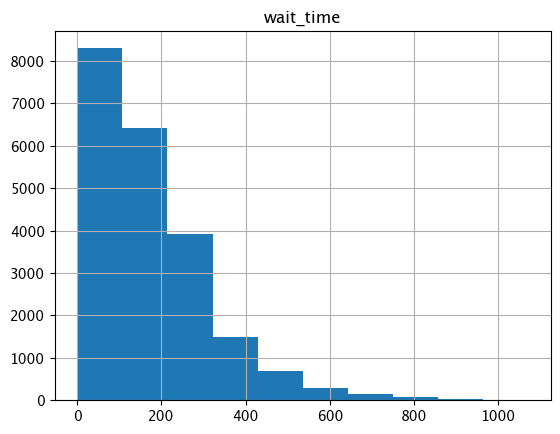

In [16]:
wt_by_scen[wt_by_scen['scenario']=='ddqnla'].hist('wait_time')

Text(0.5, 0, 'wait time (seconds)')

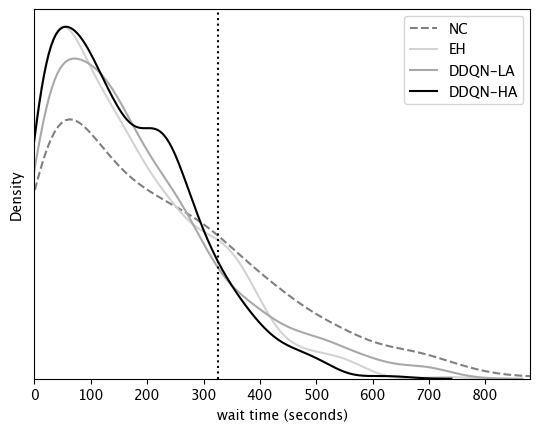

In [57]:
fig, ax = plt.subplots()
styles1 = ['bs-','ro-','y^-', 'po-']
scenarios = ['nc', 'eh', 'ddqnla', 'ddqnha']
scenario_lbls = ['NC', 'EH', 'DDQN-LA', 'DDQN-HA']

linestyles = ['dashed', 'solid', 'solid', 'solid']
colors = ['gray', 'lightgray', 'darkgray', 'black']
for i in range(len(linestyles)):
    sns.kdeplot(
        data=wt_by_scen_peak[wt_by_scen_peak['scenario']==scenarios[i]], x='wait_time', ax=ax, linestyle=linestyles[i], color=colors[i], label=scenario_lbls[i])
plt.legend()
plt.axvline(wt_by_scen_peak.loc[wt_by_scen_peak['scenario']=='ddqnha','wait_time'].quantile(0.9), color='black', linestyle='dotted')
plt.xlim(0,880)
ax.set_yticks([])
ax.set_ylabel('Density')
ax.set_xlabel('wait time (seconds)')